# import library and data

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels

# bitcoin price

In [3]:
df1 = pd.read_csv("data/price/btc_usd_2014_9_17_2022_3_25.csv")
df2 = pd.read_csv("data/price/btc_usd_2022_3_26_2022_10_5.csv")
df_day = pd.concat([df1, df2])
df_day["Date"] = pd.to_datetime(df_day["Date"])
df_day.rename({"Date": "date"}, axis=1, inplace=True)
df_day.set_index("date", inplace=True)
df = df_day.resample("W-SUN").mean()

df_output = pd.DataFrame()
df_output.index = df.index
df_output["bitcoin_price"] = df["Adj Close"]
df_output["bitcoin_return"] = (np.log(df["Adj Close"]) - np.log(df["Adj Close"].shift(1)))[1:]
df_output

,bitcoin_price,bitcoin_return
date,,
2014-09-21,416.859003,NaN
2014-09-28,407.692566,-0.022235
2014-10-05,361.426570,-0.120454
2014-10-12,355.234580,-0.017281
2014-10-19,390.479854,0.094598
...,...,...
2022-09-11,20300.163505,0.014466
2022-09-18,20275.589007,-0.001211
2022-09-25,19061.802455,-0.061731


# bitcoin trading volume

In [4]:
df = pd.read_csv("data/trading_volume/trade-volume.csv")
df.rename({"x": "date", "y": "trade_volume"}, axis=1, inplace=True)
df.date = pd.to_datetime(df.date, unit="ms")
df.set_index("date", inplace=True)
df = df.resample("W-SUN").mean()

df_output["trade_volume"] = df.loc["2014-09-21": "2022-10-09"].trade_volume
df_output

,bitcoin_price,bitcoin_return,trade_volume
date,,,
2014-09-21,416.859003,NaN,6.148184e+06
2014-09-28,407.692566,-0.022235,4.632593e+06
2014-10-05,361.426570,-0.120454,6.455706e+06
2014-10-12,355.234580,-0.017281,2.009092e+07
2014-10-19,390.479854,0.094598,5.241826e+06
...,...,...,...
2022-09-11,20300.163505,0.014466,2.848979e+08
2022-09-18,20275.589007,-0.001211,1.741126e+08
2022-09-25,19061.802455,-0.061731,1.610598e+08


# bitcoin transaction volume

In [5]:
df = pd.read_csv("data/trading_volume/n-transactions-total.csv")
df.rename({"x": "date", "y": "transaction_volume"}, axis=1, inplace=True)
df.date = pd.to_datetime(df.date, unit="ms")
df.set_index("date", inplace=True)
df = df.resample("W-SUN").mean()
df_output["transaction＿volume"] = df.loc["2014-09-21": "2022-10-09"].transaction_volume


df_output

,bitcoin_price,bitcoin_return,trade_volume,transaction＿volume
date,,,,
2014-09-21,416.859003,NaN,6.148184e+06,46822050.0
2014-09-28,407.692566,-0.022235,4.632593e+06,47371425.0
2014-10-05,361.426570,-0.120454,6.455706e+06,47910438.5
2014-10-12,355.234580,-0.017281,2.009092e+07,48352004.0
2014-10-19,390.479854,0.094598,5.241826e+06,48921584.0
...,...,...,...,...
2022-09-11,20300.163505,0.014466,2.848979e+08,762626533.5
2022-09-18,20275.589007,-0.001211,1.741126e+08,764176801.5
2022-09-25,19061.802455,-0.061731,1.610598e+08,766116252.0


# jobless weekly continued claims

In [6]:
df = pd.read_csv("data/jobless/continued_claims.csv")
df.rename({"DATE": "date", "CCSA": "continued_claims"}, axis=1, inplace=True)
df.date = pd.to_datetime(df.date)
df.date = df.date + pd.DateOffset(1)
df.set_index("date", inplace=True)

df_output["continued_claims"] = df.continued_claims
df_output

,bitcoin_price,bitcoin_return,trade_volume,transaction＿volume,continued_claims
date,,,,,
2014-09-21,416.859003,NaN,6.148184e+06,46822050.0,2447000
2014-09-28,407.692566,-0.022235,4.632593e+06,47371425.0,2427000
2014-10-05,361.426570,-0.120454,6.455706e+06,47910438.5,2441000
2014-10-12,355.234580,-0.017281,2.009092e+07,48352004.0,2409000
2014-10-19,390.479854,0.094598,5.241826e+06,48921584.0,2437000
...,...,...,...,...,...
2022-09-11,20300.163505,0.014466,2.848979e+08,762626533.5,1376000
2022-09-18,20275.589007,-0.001211,1.741126e+08,764176801.5,1346000
2022-09-25,19061.802455,-0.061731,1.610598e+08,766116252.0,1365000


# jobless weekly initial claims

In [7]:
df = pd.read_csv("data/jobless/initial_claims.csv")
df.rename({"DATE": "date", "ICSA": "initial_claims"}, axis=1, inplace=True)
df.date = pd.to_datetime(df.date)
df.date = df.date + pd.DateOffset(1)
df.set_index("date", inplace=True)

df_output["initial_claims"] = df.initial_claims
df_output

,bitcoin_price,bitcoin_return,trade_volume,transaction＿volume,continued_claims,initial_claims
date,,,,,,
2014-09-21,416.859003,NaN,6.148184e+06,46822050.0,2447000,295000
2014-09-28,407.692566,-0.022235,4.632593e+06,47371425.0,2427000,290000
2014-10-05,361.426570,-0.120454,6.455706e+06,47910438.5,2441000,293000
2014-10-12,355.234580,-0.017281,2.009092e+07,48352004.0,2409000,281000
2014-10-19,390.479854,0.094598,5.241826e+06,48921584.0,2437000,290000
...,...,...,...,...,...,...
2022-09-11,20300.163505,0.014466,2.848979e+08,762626533.5,1376000,208000
2022-09-18,20275.589007,-0.001211,1.741126e+08,764176801.5,1346000,209000
2022-09-25,19061.802455,-0.061731,1.610598e+08,766116252.0,1365000,190000


# FX market

In [8]:
df = pd.read_csv("data/FX/FRB_H10.csv")
df = df[6:]
df.rename({"Series Description": "date"}, axis=1, inplace=True)
df.date = pd.to_datetime(df.date)
df.set_index("date", inplace=True)
for i in df.columns:
    df[i] = pd.to_numeric(df[i].apply(lambda x: 0 if x=="ND" else x))

df = df.resample("W-SUN").mean()
df = df.loc["2014-09-21": "2022-10-09"]
df_output = pd.concat([df_output, df.copy()], axis=1)

df_output

,bitcoin_price,bitcoin_return,trade_volume,transaction＿volume,continued_claims,initial_claims,nominal_advanced_foreign_economies_dollar_index,nominal_emerging_market_economies_dollar_index,FX_spot_euro,FX_spot_brazil,FX_spot_china,FX_spot_india,FX_spot_mexico,FX_spot_south_africa,FX_spot_japan,FX_spot_korea,FX_spot_hong_kong,FX_spot_uk
date,,,,,,,,,,,,,,,,,,
2014-09-21,416.859003,NaN,6.148184e+06,46822050.0,2447000,295000,94.65934,98.64552,1.29266,2.34970,6.14124,60.914,13.20810,10.99160,107.864,1039.030,7.75102,1.63096
2014-09-28,407.692566,-0.022235,4.632593e+06,47371425.0,2427000,290000,95.55800,99.10358,1.27818,2.40812,6.13470,61.074,13.33510,11.17620,108.928,1041.424,7.75324,1.63242
2014-10-05,361.426570,-0.120454,6.455706e+06,47910438.5,2441000,293000,96.48250,99.77310,1.26272,2.46878,6.14040,61.716,13.45056,11.27570,109.220,1058.520,7.76256,1.61600
2014-10-12,355.234580,-0.017281,2.009092e+07,48352004.0,2409000,281000,96.35134,99.65044,1.26440,2.40558,6.13524,61.306,13.42810,11.15400,108.324,1069.650,7.75628,1.60682
2014-10-19,390.479854,0.094598,5.241826e+06,48921584.0,2437000,290000,76.83158,79.84632,1.02010,1.94812,4.89934,49.212,10.80780,8.85860,85.182,849.460,6.20594,1.28080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-11,20300.163505,0.014466,2.848979e+08,762626533.5,1376000,208000,96.35184,104.37922,0.79716,4.17044,5.55968,63.800,16.00140,13.86650,114.766,1103.984,6.27952,0.92222
2022-09-18,20275.589007,-0.001211,1.741126e+08,764176801.5,1346000,209000,120.07884,130.62450,1.00246,5.20754,6.95710,79.546,19.98060,17.43350,143.250,1384.130,7.84896,1.15364
2022-09-25,19061.802455,-0.061731,1.610598e+08,766116252.0,1365000,190000,121.91330,131.72788,0.98874,5.18392,7.05486,80.300,20.02600,17.72136,143.292,1400.108,7.84954,1.12656


# Stress

### VIX

In [9]:
df = pd.read_csv("data/stress/VIX_History.csv")
df.rename({"DATE": "date"}, axis=1, inplace=True)
df.date = pd.to_datetime(df.date)
df.set_index("date", inplace=True)
df = df.resample("W-SUN").mean().loc["2014-09-21": "2022-10-09"]

df_output["vix"] = df.CLOSE
df_output

,bitcoin_price,bitcoin_return,trade_volume,transaction＿volume,continued_claims,initial_claims,nominal_advanced_foreign_economies_dollar_index,nominal_emerging_market_economies_dollar_index,FX_spot_euro,FX_spot_brazil,FX_spot_china,FX_spot_india,FX_spot_mexico,FX_spot_south_africa,FX_spot_japan,FX_spot_korea,FX_spot_hong_kong,FX_spot_uk,vix
date,,,,,,,,,,,,,,,,,,,
2014-09-21,416.859003,NaN,6.148184e+06,46822050.0,2447000,295000,94.65934,98.64552,1.29266,2.34970,6.14124,60.914,13.20810,10.99160,107.864,1039.030,7.75102,1.63096,12.728
2014-09-28,407.692566,-0.022235,4.632593e+06,47371425.0,2427000,290000,95.55800,99.10358,1.27818,2.40812,6.13470,61.074,13.33510,11.17620,108.928,1041.424,7.75324,1.63242,14.476
2014-10-05,361.426570,-0.120454,6.455706e+06,47910438.5,2441000,293000,96.48250,99.77310,1.26272,2.46878,6.14040,61.716,13.45056,11.27570,109.220,1058.520,7.76256,1.61600,15.942
2014-10-12,355.234580,-0.017281,2.009092e+07,48352004.0,2409000,281000,96.35134,99.65044,1.26440,2.40558,6.13524,61.306,13.42810,11.15400,108.324,1069.650,7.75628,1.60682,17.554
2014-10-19,390.479854,0.094598,5.241826e+06,48921584.0,2437000,290000,76.83158,79.84632,1.02010,1.94812,4.89934,49.212,10.80780,8.85860,85.182,849.460,6.20594,1.28080,24.174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-11,20300.163505,0.014466,2.848979e+08,762626533.5,1376000,208000,96.35184,104.37922,0.79716,4.17044,5.55968,63.800,16.00140,13.86650,114.766,1103.984,6.27952,0.92222,24.788
2022-09-18,20275.589007,-0.001211,1.741126e+08,764176801.5,1346000,209000,120.07884,130.62450,1.00246,5.20754,6.95710,79.546,19.98060,17.43350,143.250,1384.130,7.84896,1.15364,25.974
2022-09-25,19061.802455,-0.061731,1.610598e+08,766116252.0,1365000,190000,121.91330,131.72788,0.98874,5.18392,7.05486,80.300,20.02600,17.72136,143.292,1400.108,7.84954,1.12656,27.636


### TED spread

In [10]:
df = pd.read_csv("data/stress/ted_spread.csv")
df.rename({"DATE": "date", "TEDRATE": "ted_spread"}, axis=1, inplace=True)
df.date = pd.to_datetime(df.date)
df.set_index("date", inplace=True)
df.ted_spread = pd.to_numeric(df.ted_spread.apply(lambda x: 0 if x=="." else x))
df = df.resample("W-SUN").mean().loc["2014-09-21": "2022-10-09"]  # only has the data to 2022-01-23

df_output["ted_spread"] = df.ted_spread
df_output

,bitcoin_price,bitcoin_return,trade_volume,transaction＿volume,continued_claims,initial_claims,nominal_advanced_foreign_economies_dollar_index,nominal_emerging_market_economies_dollar_index,FX_spot_euro,FX_spot_brazil,FX_spot_china,FX_spot_india,FX_spot_mexico,FX_spot_south_africa,FX_spot_japan,FX_spot_korea,FX_spot_hong_kong,FX_spot_uk,vix,ted_spread
date,,,,,,,,,,,,,,,,,,,,
2014-09-21,416.859003,NaN,6.148184e+06,46822050.0,2447000,295000,94.65934,98.64552,1.29266,2.34970,6.14124,60.914,13.20810,10.99160,107.864,1039.030,7.75102,1.63096,12.728,0.210
2014-09-28,407.692566,-0.022235,4.632593e+06,47371425.0,2427000,290000,95.55800,99.10358,1.27818,2.40812,6.13470,61.074,13.33510,11.17620,108.928,1041.424,7.75324,1.63242,14.476,0.222
2014-10-05,361.426570,-0.120454,6.455706e+06,47910438.5,2441000,293000,96.48250,99.77310,1.26272,2.46878,6.14040,61.716,13.45056,11.27570,109.220,1058.520,7.76256,1.61600,15.942,0.218
2014-10-12,355.234580,-0.017281,2.009092e+07,48352004.0,2409000,281000,96.35134,99.65044,1.26440,2.40558,6.13524,61.306,13.42810,11.15400,108.324,1069.650,7.75628,1.60682,17.554,0.216
2014-10-19,390.479854,0.094598,5.241826e+06,48921584.0,2437000,290000,76.83158,79.84632,1.02010,1.94812,4.89934,49.212,10.80780,8.85860,85.182,849.460,6.20594,1.28080,24.174,0.166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-11,20300.163505,0.014466,2.848979e+08,762626533.5,1376000,208000,96.35184,104.37922,0.79716,4.17044,5.55968,63.800,16.00140,13.86650,114.766,1103.984,6.27952,0.92222,24.788,NaN
2022-09-18,20275.589007,-0.001211,1.741126e+08,764176801.5,1346000,209000,120.07884,130.62450,1.00246,5.20754,6.95710,79.546,19.98060,17.43350,143.250,1384.130,7.84896,1.15364,25.974,NaN
2022-09-25,19061.802455,-0.061731,1.610598e+08,766116252.0,1365000,190000,121.91330,131.72788,0.98874,5.18392,7.05486,80.300,20.02600,17.72136,143.292,1400.108,7.84954,1.12656,27.636,NaN


### FSI

In [11]:
df = pd.read_csv("data/stress/FSI.csv")
df.rename({"DATE": "date", "STLFSI3": "FSI"}, axis=1, inplace=True)
df.date = pd.to_datetime(df.date)
df.date = df.date - pd.DateOffset(5)
df.set_index("date", inplace=True)


df_output["FSI"] = df.FSI
df_output

,bitcoin_price,bitcoin_return,trade_volume,transaction＿volume,continued_claims,initial_claims,nominal_advanced_foreign_economies_dollar_index,nominal_emerging_market_economies_dollar_index,FX_spot_euro,FX_spot_brazil,...,FX_spot_india,FX_spot_mexico,FX_spot_south_africa,FX_spot_japan,FX_spot_korea,FX_spot_hong_kong,FX_spot_uk,vix,ted_spread,FSI
date,,,,,,,,,,,,,,,,,,,,,
2014-09-21,416.859003,NaN,6.148184e+06,46822050.0,2447000,295000,94.65934,98.64552,1.29266,2.34970,...,60.914,13.20810,10.99160,107.864,1039.030,7.75102,1.63096,12.728,0.210,-0.3311
2014-09-28,407.692566,-0.022235,4.632593e+06,47371425.0,2427000,290000,95.55800,99.10358,1.27818,2.40812,...,61.074,13.33510,11.17620,108.928,1041.424,7.75324,1.63242,14.476,0.222,-0.2901
2014-10-05,361.426570,-0.120454,6.455706e+06,47910438.5,2441000,293000,96.48250,99.77310,1.26272,2.46878,...,61.716,13.45056,11.27570,109.220,1058.520,7.76256,1.61600,15.942,0.218,-0.2243
2014-10-12,355.234580,-0.017281,2.009092e+07,48352004.0,2409000,281000,96.35134,99.65044,1.26440,2.40558,...,61.306,13.42810,11.15400,108.324,1069.650,7.75628,1.60682,17.554,0.216,0.2736
2014-10-19,390.479854,0.094598,5.241826e+06,48921584.0,2437000,290000,76.83158,79.84632,1.02010,1.94812,...,49.212,10.80780,8.85860,85.182,849.460,6.20594,1.28080,24.174,0.166,-0.5195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-11,20300.163505,0.014466,2.848979e+08,762626533.5,1376000,208000,96.35184,104.37922,0.79716,4.17044,...,63.800,16.00140,13.86650,114.766,1103.984,6.27952,0.92222,24.788,NaN,-1.8351
2022-09-18,20275.589007,-0.001211,1.741126e+08,764176801.5,1346000,209000,120.07884,130.62450,1.00246,5.20754,...,79.546,19.98060,17.43350,143.250,1384.130,7.84896,1.15364,25.974,NaN,-1.5695
2022-09-25,19061.802455,-0.061731,1.610598e+08,766116252.0,1365000,190000,121.91330,131.72788,0.98874,5.18392,...,80.300,20.02600,17.72136,143.292,1400.108,7.84954,1.12656,27.636,NaN,-1.2070


# Speculate

### federal funds effective rate

In [12]:
df = pd.read_csv("data/other/ffer.csv")
df.rename({"DATE": "date", "DFF": "ffef"}, axis=1, inplace=True)
df.date = pd.to_datetime(df.date)
df.set_index("date", inplace=True)
df = df.resample("W-SUN").mean().loc["2014-09-21": "2022-10-09"]

df_output["ffef"] = df.ffef
df_output

,bitcoin_price,bitcoin_return,trade_volume,transaction＿volume,continued_claims,initial_claims,nominal_advanced_foreign_economies_dollar_index,nominal_emerging_market_economies_dollar_index,FX_spot_euro,FX_spot_brazil,...,FX_spot_mexico,FX_spot_south_africa,FX_spot_japan,FX_spot_korea,FX_spot_hong_kong,FX_spot_uk,vix,ted_spread,FSI,ffef
date,,,,,,,,,,,,,,,,,,,,,
2014-09-21,416.859003,NaN,6.148184e+06,46822050.0,2447000,295000,94.65934,98.64552,1.29266,2.34970,...,13.20810,10.99160,107.864,1039.030,7.75102,1.63096,12.728,0.210,-0.3311,0.090000
2014-09-28,407.692566,-0.022235,4.632593e+06,47371425.0,2427000,290000,95.55800,99.10358,1.27818,2.40812,...,13.33510,11.17620,108.928,1041.424,7.75324,1.63242,14.476,0.222,-0.2901,0.090000
2014-10-05,361.426570,-0.120454,6.455706e+06,47910438.5,2441000,293000,96.48250,99.77310,1.26272,2.46878,...,13.45056,11.27570,109.220,1058.520,7.76256,1.61600,15.942,0.218,-0.2243,0.085714
2014-10-12,355.234580,-0.017281,2.009092e+07,48352004.0,2409000,281000,96.35134,99.65044,1.26440,2.40558,...,13.42810,11.15400,108.324,1069.650,7.75628,1.60682,17.554,0.216,0.2736,0.088571
2014-10-19,390.479854,0.094598,5.241826e+06,48921584.0,2437000,290000,76.83158,79.84632,1.02010,1.94812,...,10.80780,8.85860,85.182,849.460,6.20594,1.28080,24.174,0.166,-0.5195,0.090000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-11,20300.163505,0.014466,2.848979e+08,762626533.5,1376000,208000,96.35184,104.37922,0.79716,4.17044,...,16.00140,13.86650,114.766,1103.984,6.27952,0.92222,24.788,NaN,-1.8351,2.330000
2022-09-18,20275.589007,-0.001211,1.741126e+08,764176801.5,1346000,209000,120.07884,130.62450,1.00246,5.20754,...,19.98060,17.43350,143.250,1384.130,7.84896,1.15364,25.974,NaN,-1.5695,2.330000
2022-09-25,19061.802455,-0.061731,1.610598e+08,766116252.0,1365000,190000,121.91330,131.72788,0.98874,5.18392,...,20.02600,17.72136,143.292,1400.108,7.84954,1.12656,27.636,NaN,-1.2070,2.758571


### bid-ask spread

##### create volume adjusted bid-ask spread

In [13]:
df_vol = pd.read_csv("data/other/bitcoinity_data.csv")
df_vol.rename({"Time": "date"}, axis=1, inplace=True)
df_vol.date = df_vol.date.apply(lambda x: str(x).split(" ")[0])
df_vol.date = pd.to_datetime(df_vol.date)
df_vol.set_index("date", inplace=True)
df_vol = df_vol.fillna(0)
df_vol = df_vol.loc["2014-09-22": "2022-10-10"]
df_vol.index = df_vol.index - pd.DateOffset(1)
df_vol

df_spread = pd.read_csv("data/other/bid_ask_spread.csv")
df_spread.rename({"Time": "date"}, axis=1, inplace=True)
df_spread.date = df_spread.date.apply(lambda x: str(x).split(" ")[0])
df_spread.date = pd.to_datetime(df_spread.date)
df_spread.set_index("date", inplace=True)
df_spread = df_spread.fillna(0)
df_spread = df_spread.loc["2014-09-22": "2022-10-10"]
df_spread.index = df_spread.index - pd.DateOffset(1)

cols = set.intersection(set(df_vol.columns), set(df_spread.columns))
cols.remove("others")
diff_volcol = list(set.difference(set(df_vol.columns), cols))
diff_spreadcol = list(set.difference(set(df_spread.columns), cols))

df_vol_new = pd.DataFrame(index=df_vol.index)
df_spread_new = pd.DataFrame(index=df_spread.index)
for i in cols:
    df_vol_new[i] = df_vol[i]
    df_spread_new[i] = df_spread[i]
df_vol_new["others"] = df_vol[diff_volcol].sum(axis=1)
df_vol_new["total_vol"] = df_vol_new.sum(axis=1)
df_spread_new["others"] = df_spread["others"]

cols.add("others")
df_adjusted_spread = pd.DataFrame(index=df_spread.index)
for i in cols:
    df_adjusted_spread[i] = df_spread[i] * (df_vol_new[i] / df_vol_new["total_vol"])

df_output["bid_ask_spread"] = df_adjusted_spread.sum(axis=1)
df_output

,bitcoin_price,bitcoin_return,trade_volume,transaction＿volume,continued_claims,initial_claims,nominal_advanced_foreign_economies_dollar_index,nominal_emerging_market_economies_dollar_index,FX_spot_euro,FX_spot_brazil,...,FX_spot_south_africa,FX_spot_japan,FX_spot_korea,FX_spot_hong_kong,FX_spot_uk,vix,ted_spread,FSI,ffef,bid_ask_spread
date,,,,,,,,,,,,,,,,,,,,,
2014-09-21,416.859003,NaN,6.148184e+06,46822050.0,2447000,295000,94.65934,98.64552,1.29266,2.34970,...,10.99160,107.864,1039.030,7.75102,1.63096,12.728,0.210,-0.3311,0.090000,1.765227
2014-09-28,407.692566,-0.022235,4.632593e+06,47371425.0,2427000,290000,95.55800,99.10358,1.27818,2.40812,...,11.17620,108.928,1041.424,7.75324,1.63242,14.476,0.222,-0.2901,0.090000,1.098035
2014-10-05,361.426570,-0.120454,6.455706e+06,47910438.5,2441000,293000,96.48250,99.77310,1.26272,2.46878,...,11.27570,109.220,1058.520,7.76256,1.61600,15.942,0.218,-0.2243,0.085714,1.502774
2014-10-12,355.234580,-0.017281,2.009092e+07,48352004.0,2409000,281000,96.35134,99.65044,1.26440,2.40558,...,11.15400,108.324,1069.650,7.75628,1.60682,17.554,0.216,0.2736,0.088571,1.138642
2014-10-19,390.479854,0.094598,5.241826e+06,48921584.0,2437000,290000,76.83158,79.84632,1.02010,1.94812,...,8.85860,85.182,849.460,6.20594,1.28080,24.174,0.166,-0.5195,0.090000,1.075942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-11,20300.163505,0.014466,2.848979e+08,762626533.5,1376000,208000,96.35184,104.37922,0.79716,4.17044,...,13.86650,114.766,1103.984,6.27952,0.92222,24.788,NaN,-1.8351,2.330000,3.444020
2022-09-18,20275.589007,-0.001211,1.741126e+08,764176801.5,1346000,209000,120.07884,130.62450,1.00246,5.20754,...,17.43350,143.250,1384.130,7.84896,1.15364,25.974,NaN,-1.5695,2.330000,2.781650
2022-09-25,19061.802455,-0.061731,1.610598e+08,766116252.0,1365000,190000,121.91330,131.72788,0.98874,5.18392,...,17.72136,143.292,1400.108,7.84954,1.12656,27.636,NaN,-1.2070,2.758571,3.045162


### s&p500 frontiers BMI

In [14]:
df = pd.read_excel("data/stress/sp500_frontiers_bmi.xls")
df.rename({"Unnamed: 0": "date", "Unnamed: 1": "frontiers_bmi"}, axis=1, inplace=True)
df = df.iloc[6:3150]
df.date = pd.to_datetime(df.date)
df.set_index("date", inplace=True)
df = df.resample("W-SUN").mean().loc["2014-09-21": "2022-10-09"]

df_output["frontiers_bmi"] = df.frontiers_bmi
df_output

,bitcoin_price,bitcoin_return,trade_volume,transaction＿volume,continued_claims,initial_claims,nominal_advanced_foreign_economies_dollar_index,nominal_emerging_market_economies_dollar_index,FX_spot_euro,FX_spot_brazil,...,FX_spot_japan,FX_spot_korea,FX_spot_hong_kong,FX_spot_uk,vix,ted_spread,FSI,ffef,bid_ask_spread,frontiers_bmi
date,,,,,,,,,,,,,,,,,,,,,
2014-09-21,416.859003,NaN,6.148184e+06,46822050.0,2447000,295000,94.65934,98.64552,1.29266,2.34970,...,107.864,1039.030,7.75102,1.63096,12.728,0.210,-0.3311,0.090000,1.765227,121.120000
2014-09-28,407.692566,-0.022235,4.632593e+06,47371425.0,2427000,290000,95.55800,99.10358,1.27818,2.40812,...,108.928,1041.424,7.75324,1.63242,14.476,0.222,-0.2901,0.090000,1.098035,121.723333
2014-10-05,361.426570,-0.120454,6.455706e+06,47910438.5,2441000,293000,96.48250,99.77310,1.26272,2.46878,...,109.220,1058.520,7.76256,1.61600,15.942,0.218,-0.2243,0.085714,1.502774,120.970000
2014-10-12,355.234580,-0.017281,2.009092e+07,48352004.0,2409000,281000,96.35134,99.65044,1.26440,2.40558,...,108.324,1069.650,7.75628,1.60682,17.554,0.216,0.2736,0.088571,1.138642,118.801667
2014-10-19,390.479854,0.094598,5.241826e+06,48921584.0,2437000,290000,76.83158,79.84632,1.02010,1.94812,...,85.182,849.460,6.20594,1.28080,24.174,0.166,-0.5195,0.090000,1.075942,115.358333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-11,20300.163505,0.014466,2.848979e+08,762626533.5,1376000,208000,96.35184,104.37922,0.79716,4.17044,...,114.766,1103.984,6.27952,0.92222,24.788,NaN,-1.8351,2.330000,3.444020,111.811667
2022-09-18,20275.589007,-0.001211,1.741126e+08,764176801.5,1346000,209000,120.07884,130.62450,1.00246,5.20754,...,143.250,1384.130,7.84896,1.15364,25.974,NaN,-1.5695,2.330000,2.781650,112.073333
2022-09-25,19061.802455,-0.061731,1.610598e+08,766116252.0,1365000,190000,121.91330,131.72788,0.98874,5.18392,...,143.292,1400.108,7.84954,1.12656,27.636,NaN,-1.2070,2.758571,3.045162,107.915000


# Merget with speculate keynes and emerging market EPU

In [15]:
df_epu = pd.read_csv("data/EmergStress_Specula.csv")
exclude = set(["Adj Close", "Volume", "yy-mm", "date"])
select = list(set.difference(set(df_epu.columns), exclude))
df_epu = df_epu[select]


time_stamp = df_output.index.to_frame().loc["2014-09-21": "2022-04-24"].index
df_epu.index = time_stamp
df_epu = df_epu.loc["2014-09-21": "2022-01-23"]
df_output = df_output.loc["2014-09-21": "2022-01-23"]
df_data = pd.concat([df_epu, df_output], axis=1)
df_data

# df_data.to_csv("data/data.csv")

,USA Economic Policy Uncertainty,Brazil EPU,China EPU,USA Fiscal Policy,Chile EPU,Russia EPU,USA Monetary policy,T10Y3M,Global EPU,Global MPU,...,FX_spot_japan,FX_spot_korea,FX_spot_hong_kong,FX_spot_uk,vix,ted_spread,FSI,ffef,bid_ask_spread,frontiers_bmi
date,,,,,,,,,,,,,,,,,,,,,
2014-09-21,53.6,199,107.9,50.1,202.6,284.7,45.6,2.5360,128.0,46,...,107.864,1039.030,7.75102,1.63096,12.7280,0.210,-0.3311,0.090000,1.765227,121.120000
2014-09-28,53.6,199,107.9,50.1,202.6,284.7,45.6,2.4500,128.0,46,...,108.928,1041.424,7.75324,1.63242,14.4760,0.222,-0.2901,0.090000,1.098035,121.723333
2014-10-05,63.7,92,99.8,67.9,148.1,161.6,41.3,2.3440,121.8,41,...,109.220,1058.520,7.76256,1.61600,15.9420,0.218,-0.2243,0.085714,1.502774,120.970000
2014-10-12,63.7,92,99.8,67.9,148.1,161.6,41.3,2.1650,121.8,41,...,108.324,1069.650,7.75628,1.60682,17.5540,0.216,0.2736,0.088571,1.138642,118.801667
2014-10-19,63.7,92,99.8,67.9,148.1,161.6,41.3,2.2360,121.8,41,...,85.182,849.460,6.20594,1.28080,24.1740,0.166,-0.5195,0.090000,1.075942,115.358333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-26,129.6,147,344.0,124.4,395.8,393.9,153.3,1.4560,270.4,153,...,91.240,952.244,6.24084,1.06460,20.1175,0.112,-0.7507,0.080000,2.122212,135.713333
2022-01-02,134.4,201,319.1,103.6,271.1,275.3,156.3,1.6080,242.1,156,...,91.948,949.814,6.23908,1.07690,17.3440,0.096,-0.8214,0.075714,2.541246,139.443333
2022-01-09,134.4,201,319.1,103.6,271.1,275.3,156.3,1.6280,242.1,156,...,115.738,1197.468,7.79700,1.35416,18.3220,0.110,-0.7064,0.080000,2.620450,136.466667


# stationary and auto correlation

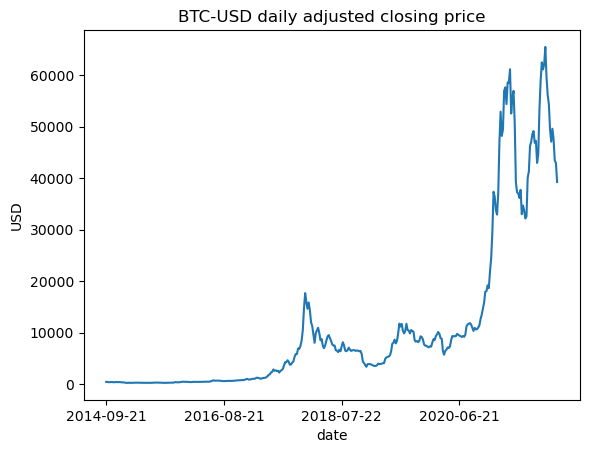

In [16]:
plt.plot(df_data.bitcoin_price)
plt.title("BTC-USD daily adjusted closing price")
plt.xlabel("date")
plt.ylabel("USD")
plt.xticks(df_data.index[::100]);

In [19]:
# Augmented Dickey-Fuller testing for month data
adf_1 = sm.tsa.stattools.adfuller(df_data.bitcoin_price)
print(f"Augmented Dickey-Fuller test: p = {adf_1[1]}")

Augmented Dickey-Fuller test: p = 0.9217565888138479


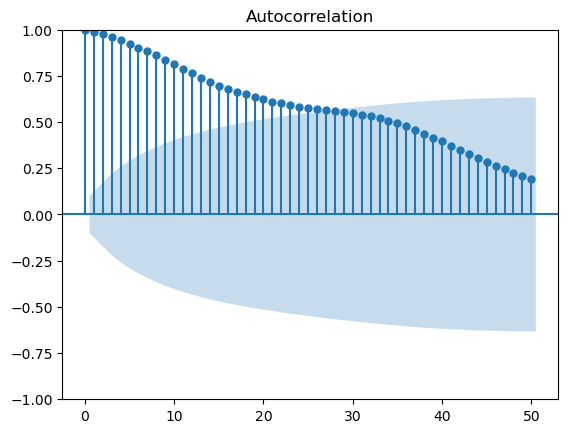

In [20]:
# plot_acf will plot and return the plot so use ; to disable printing the return
sm.graphics.tsa.plot_acf(df_data.bitcoin_price, lags=50);

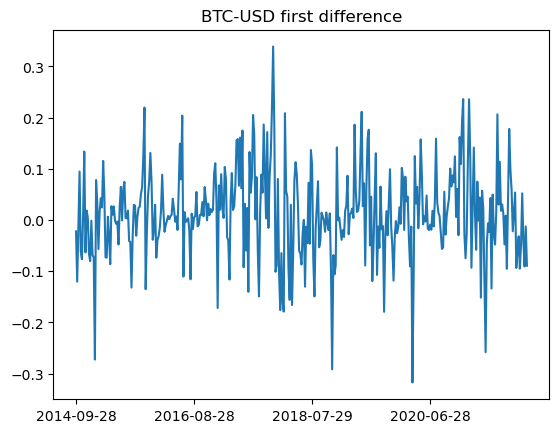

In [21]:
plt.plot(df_data.index[1:], df_data.bitcoin_return[1:])
plt.title("BTC-USD first difference")
plt.xticks(df_data.index[1:][::100]);

In [22]:
adf_2 = sm.tsa.stattools.adfuller(df_data.bitcoin_return[1:])
print(f"Augmented Dickey-Fuller test: p = {adf_2[1]}")

Augmented Dickey-Fuller test: p = 9.416058515935087e-27


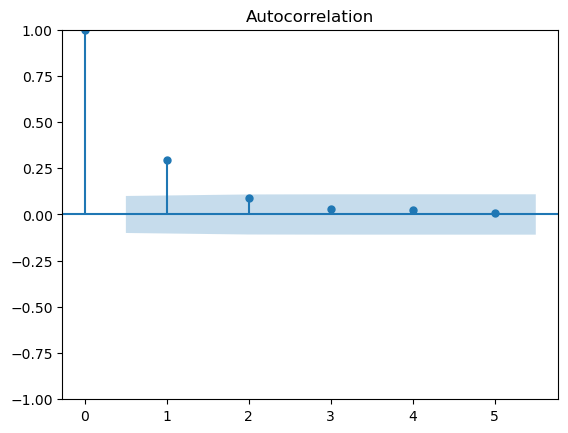

In [23]:
sm.graphics.tsa.plot_acf(df_data.bitcoin_return[1:], lags=5);